In [1]:
import glob
import seaborn as sns
import pandas as pd
import matplotlib.image as img
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical
import cv2
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from sklearn.metrics import accuracy_score
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization
from sklearn.metrics import confusion_matrix
import numpy as np
from  sklearn.linear_model import LogisticRegression
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import time 

In [24]:
desire_size = (100,100)
batch_size = 80
train_ds = tf.keras.utils.image_dataset_from_directory(
  "data/train/",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=desire_size,
  batch_size=batch_size)
val_ds = tf.keras.utils.image_dataset_from_directory(
  "data/train/",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=desire_size,
  batch_size=batch_size)

class_names = train_ds.class_names

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 4252 files belonging to 11 classes.
Using 3402 files for training.
Found 4252 files belonging to 11 classes.
Using 850 files for validation.


In [4]:
data_augmentation = Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.4),
  tf.keras.layers.RandomZoom(0.3)
])

In [25]:
model2 = Sequential([
  layers.Rescaling(1./255, input_shape=(desire_size[0], desire_size[1], 3)),
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Dropout(0.1),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(len(class_names))
])
model2.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

In [34]:
epochs = 5
history = model2.fit(
  train_ds,
  validation_data = val_ds,
  epochs = epochs
)

Epoch 1/5
43/43 [==============================] - 36s 837ms/step - loss: 0.2673 - accuracy: 0.8965 - val_loss: 0.3543 - val_accuracy: 0.8812
Epoch 2/5
43/43 [==============================] - 37s 860ms/step - loss: 0.2728 - accuracy: 0.8971 - val_loss: 0.3977 - val_accuracy: 0.8718
Epoch 3/5
43/43 [==============================] - 35s 816ms/step - loss: 0.2734 - accuracy: 0.8954 - val_loss: 0.3082 - val_accuracy: 0.9024
Epoch 4/5
43/43 [==============================] - 33s 772ms/step - loss: 0.2585 - accuracy: 0.9042 - val_loss: 0.3314 - val_accuracy: 0.8929
Epoch 5/5
43/43 [==============================] - 34s 786ms/step - loss: 0.2611 - accuracy: 0.8995 - val_loss: 0.3492 - val_accuracy: 0.8894


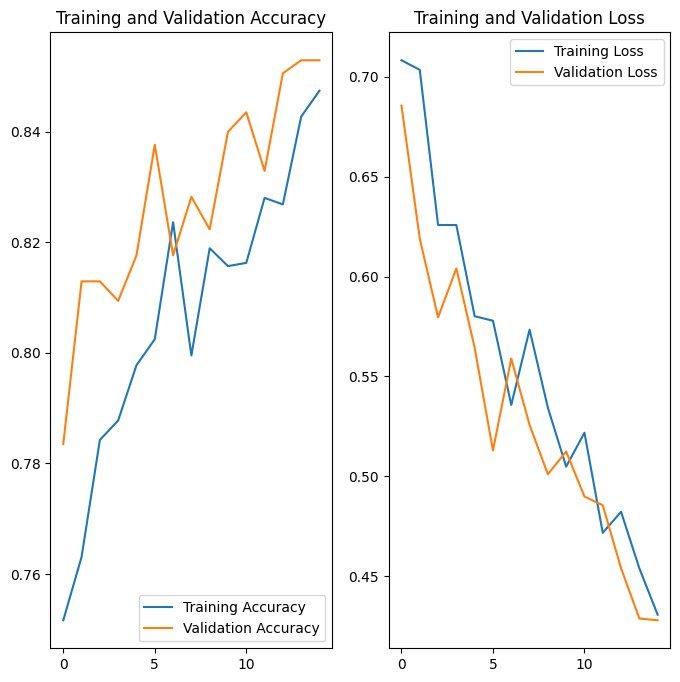

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [35]:
array_image = []
array_name = []
for file in glob.glob("data/test/*"):
  img = tf.keras.utils.load_img(
    file, 
    target_size=desire_size
  )
  img_array = tf.keras.utils.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0)
  predict = model2.predict(img_array)
  score = tf.nn.softmax(predict[0])
  array_image.append(class_names[np.argmax(score)])
  array_name.append(file.split("\\")[1])

1/1 [==============================] - 0s 36ms/step


In [36]:
df_oob = pd.DataFrame(data= zip(array_name, array_image),
                      columns=["file","species"])
df_oob.replace("Shepherds Purse","Shepherdâ€™s Purse",inplace=True) 
df_oob.to_csv("data/prediction_cnn.csv", index=False)